# Dataface Decision Tree Classifier

In [ ]:
from IPython import display
display.Image("./images/EmotionBox_Prototype2.png")

Este Notebook sirve para obtener la construccion logica de un arbol de decisiones a partir de un modelo previamente entrenado.

El entrenamiento del modelo se hace a partir de un DataSet de caras correspondientes a un cubo de 6 caras (Cubo de sentimientos / Emotion Box), y se hace por medio de un arbol de decisiones simple.

El Dataset de caras se conforma por 13 columnas (12 para las caracterizticas y 1 para la clase). Las columnas representan valores individuales que producen los componentes de la construccion fisica del cubo, los cuales son: 6 valores binarios (solo pueden ser 0 o 1) y 6 valores flotantes correspondientes al giroscopio y acelerometro del sensor de inclinacion MPU6050.
Todos estos datos son usados para inferir la posicion en 2 dimensinoes del sensor, es decir, la orientacion de la cara.

La cara que se busca es la cara que ve hacia arriba.

Cada numero de cara representa una emocion PERO este noteboook no indaga en el proposito conceptual del proyecto Cubo de Sentimientos, solo en el desarrollo del modelo y posterior muestra de la logica

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
import os
np.random.seed(42)

%matplotlib inline

Carga del archivo .csv de los lados recolectados, debe contener todas las muestras correspondientes a todos los lados.

In [2]:
cubeSides_Dataset = pd.read_csv("Side_Face_Dataset_Clean.csv",  header=None)
cubeSides_Dataset.dropna(inplace = True)
cubeSides_Dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,tVal2,tVal3,tVal4,tVal5,tVal6,tVal7,ax,ay,az,gx,gy,gz,face
1,0,1,1,1,1,1,-0.04,-0.01,-1.05,195.66,-3495.59,3536.15,1
2,0,1,1,1,1,1,-0.05,-0.01,-1.15,-2192.8,-2324.03,2901.46,1
3,0,1,1,1,1,1,-0.25,-0.01,-1.12,10680.04,30816.07,-25010.77,1
4,0,1,1,1,1,1,-0.06,0.05,-0.97,8692.45,-48919.17,21092.84,1


In [3]:
cubeSides_Dataset.describe

<bound method NDFrame.describe of          0      1      2      3      4      5      6      7      8   \
0     tVal2  tVal3  tVal4  tVal5  tVal6  tVal7     ax     ay     az   
1         0      1      1      1      1      1  -0.04  -0.01  -1.05   
2         0      1      1      1      1      1  -0.05  -0.01  -1.15   
3         0      1      1      1      1      1  -0.25  -0.01  -1.12   
4         0      1      1      1      1      1  -0.06   0.05  -0.97   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...   
2864      1      1      1      1      1      0      0  -0.57   0.54   
2865      1      0      1      1      1      0  -0.02  -0.18   0.86   
2866      1      1      1      1      1      0  -0.42   0.09   0.86   
2867      1      1      1      1      1      0  -0.06   0.28   0.84   
2868      1      1      1      1      1      0   0.66   0.56   0.81   

             9          10         11    12  
0            gx         gy         gz  face  
1        195.66   -34

In [4]:
cubeSides_Dataset.columns = cubeSides_Dataset.iloc[0]
cubeSides_Dataset = cubeSides_Dataset[1:]

Agregar encabezado a las columnas

In [5]:
cubeSides_Dataset.columns = ['t1','t2','t3','t4','t5','t6','ax','ay','az','gx','gy','gz','f']
cubeSides_Dataset.head()

,t1,t2,t3,t4,t5,t6,ax,ay,az,gx,gy,gz,f
1,0,1,1,1,1,1,-0.04,-0.01,-1.05,195.66,-3495.59,3536.15,1
2,0,1,1,1,1,1,-0.05,-0.01,-1.15,-2192.8,-2324.03,2901.46,1
3,0,1,1,1,1,1,-0.25,-0.01,-1.12,10680.04,30816.07,-25010.77,1
4,0,1,1,1,1,1,-0.06,0.05,-0.97,8692.45,-48919.17,21092.84,1
5,0,1,1,1,1,1,-0.15,-0.1,-1.21,-22128.39,3245.05,8255.79,1


Seccionar el dataset completo en los datasets de entrenamiento y prueba en un 70/30

In [6]:
X = cubeSides_Dataset.iloc[:, :-1]
y = cubeSides_Dataset.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

Crear el clasificador de arbol de decisiones

In [7]:
from sklearn.tree import DecisionTreeClassifier

tree_Pred_Side = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=1)
tree_Pred_Side.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

Evaluacion del modelo, todas las metricas presentan una porcentaje de exito del 90% o mas, por ende se puede decir que es efectivo.

In [8]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(tree_Pred_Side.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(tree_Pred_Side.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.97
Accuracy of Decision Tree classifier on test set: 0.96


In [9]:
predictions = tree_Pred_Side.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       1.00      0.92      0.96       104
           2       0.97      0.97      0.97        98
           3       0.98      0.98      0.98       107
           4       0.90      0.98      0.94        89
           5       0.93      0.96      0.94        77
           6       0.99      0.96      0.97        99

    accuracy                           0.96       574
   macro avg       0.96      0.96      0.96       574
weighted avg       0.96      0.96      0.96       574



Graficacion en forma de arbol del modelo, esto es fundamental para la creacion de la funcion encargada de predecir 

In [10]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

In [11]:
dot_data = export_graphviz(tree_Pred_Side, filled=True, rounded=True, class_names=['1', '2', '3', '4','5','6'], feature_names=['t1','t2','t3','t4','t5','t6','ax','ay','az','gx','gy','gz'], out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('Side_Pred_Tree.png')

True

Estructura del modelo de arbol, con esto es posible crear la funcion la cual predecira el lado del cubo segun una tira de datos.

In [11]:
from sklearn import tree as arbol

text_rep = arbol.export_text(tree_Pred_Side)
print(text_rep)

|--- feature_8 <= -0.88
|   |--- feature_7 <= -0.65
|   |   |--- class: 2
|   |--- feature_7 >  -0.65
|   |   |--- feature_6 <= 0.75
|   |   |   |--- feature_7 <= 0.72
|   |   |   |   |--- class: 1
|   |   |   |--- feature_7 >  0.72
|   |   |   |   |--- class: 4
|   |   |--- feature_6 >  0.75
|   |   |   |--- class: 5
|--- feature_8 >  -0.88
|   |--- feature_8 <= 0.53
|   |   |--- feature_7 <= -0.63
|   |   |   |--- feature_6 <= 0.85
|   |   |   |   |--- feature_6 <= -0.62
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_6 >  -0.62
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_6 >  0.85
|   |   |   |   |--- feature_8 <= -0.06
|   |   |   |   |   |--- class: 5
|   |   |   |   |--- feature_8 >  -0.06
|   |   |   |   |   |--- class: 2
|   |   |--- feature_7 >  -0.63
|   |   |   |--- feature_6 <= -0.56
|   |   |   |   |--- feature_7 <= 0.65
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_7 >  0.65
|   |   |   |   |   |--- class: 4
|   |   |   |--- 

Grafica que representa el arbol (anterior)

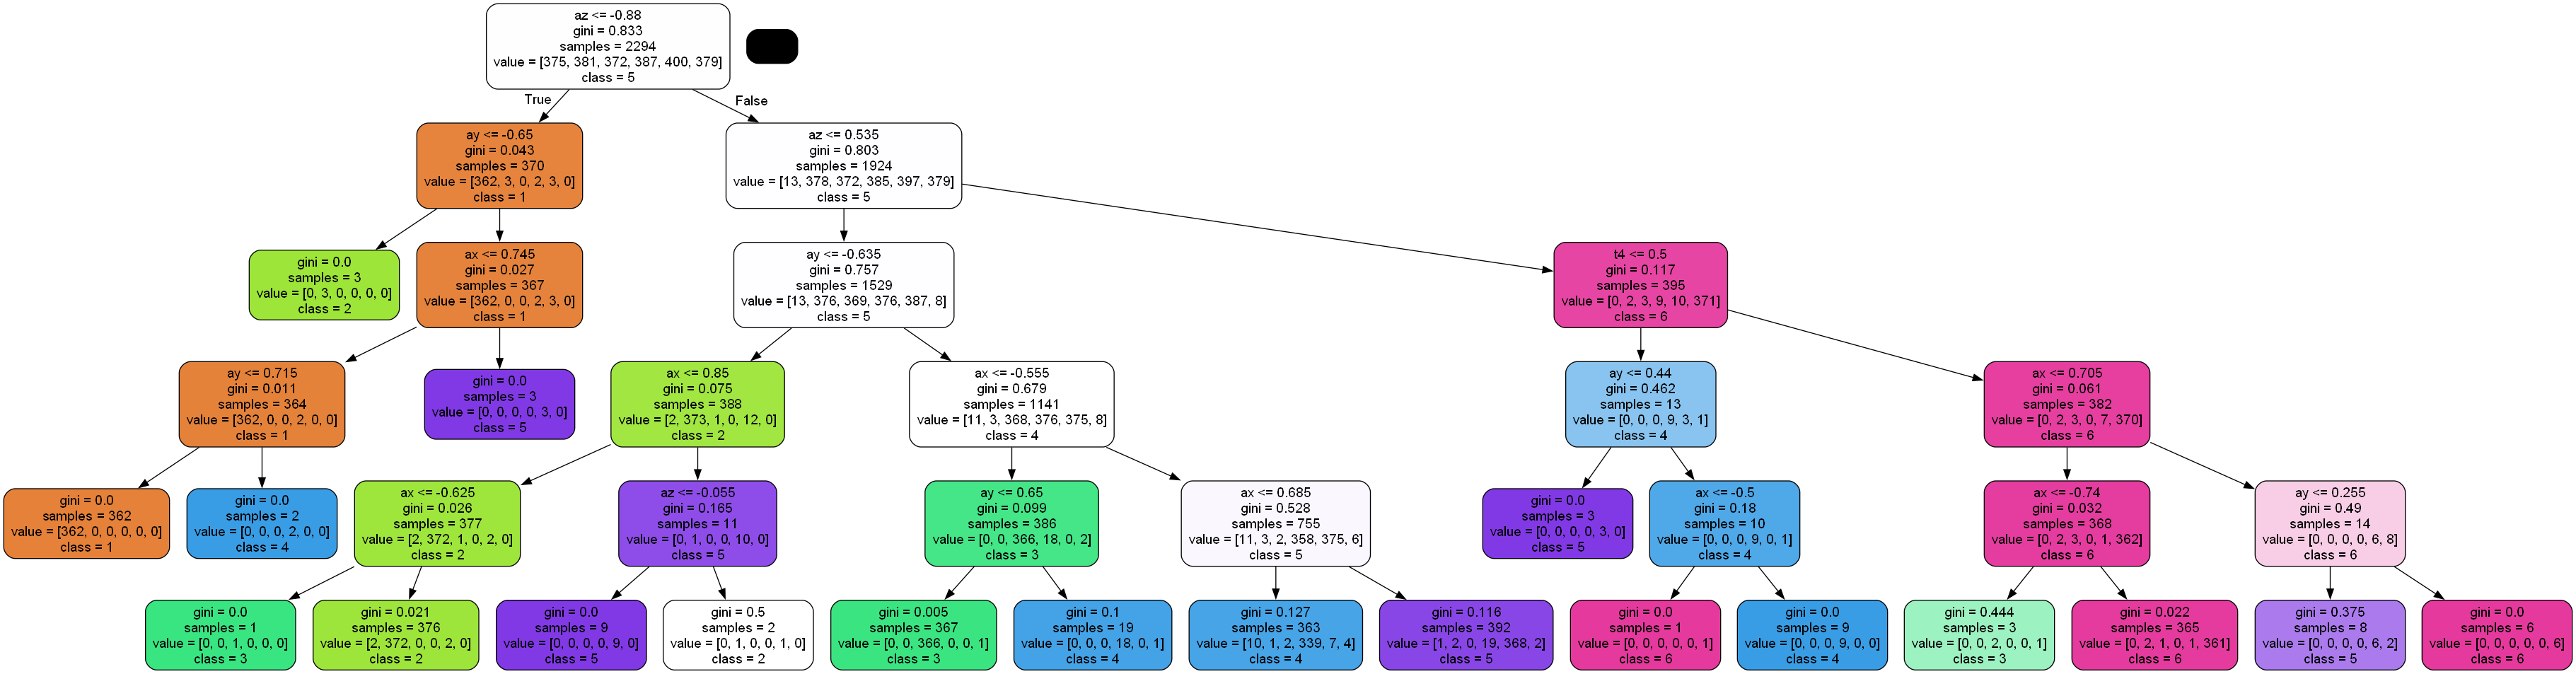

In [19]:
from IPython import display

display.Image("Side_Pred_Tree.png")

Grafica que representa el arbol (actual)

Obtenecion de filas aleatorias para probar la funcion de prediccion

In [15]:
cubeSides_Dataset.sample(3)

,t1,t2,t3,t4,t5,t6,ax,ay,az,gx,gy,gz,f
444,0,1,1,1,1,1,0.03,-0.04,-1.14,7926.52,-50484.43,-15521.37,1
2395,1,1,1,1,1,0,0.09,-0.03,0.8,3354.81,17096.18,2593.66,6
762,1,0,1,1,1,1,0.19,-1,-0.14,3025.53,1004.53,231.45,2


In [16]:
X_test.sample(3)

,t1,t2,t3,t4,t5,t6,ax,ay,az,gx,gy,gz
708,1,0,1,1,1,1,0.25,-0.81,-0.16,-39625.43,-37205.96,-17964.71
2491,1,1,1,1,1,0,0.33,0.3,0.76,-30038.21,51038,73736.66
94,0,1,1,1,1,1,0.13,-0.06,-1.14,-959.2,-6769.27,-5292.3


In [17]:
cubeSides_Dataset.iloc[852]

t1           1
t2           0
t3           1
t4           1
t5           1
t6           0
ax        -0.1
ay       -0.83
az         0.1
gx    67726.16
gy     7938.45
gz    -4862.81
f            2
Name: 853, dtype: object